# Wyznaczenie wartości $\pi$ z pomocą algorytmu Monte Carlo
**Autor:** Michał Terefenko

### Potrzebne biblioteki

In [1]:
import numpy as np
import math
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

### Wylosowanie wartości współrzędnych i kwalifikacja punktów dla różnych ilości strzałów
1. Z rozkładu jednostajnego losuję odpowiednio 100, 1000, 10000, 100000 współrzednych x-owych i y-owych punktów.
2. Powstałe punkty rozdzielam na te, które wpadły do obszaru koła (in_cx, in_cy) oraz na te, które znajdują się poza nim (out_cx, out_cy)
3. Wizualizacja wygenerowanych punktów

###### Widzimy, że wraz z wzrostem liczby punktów nasze koło staje się co raz lepiej widoczne i dokładniej zapełnione, rozkład nie ma tendecji do klasteryzacji, a więc z równym prawdopodobieństwem punkt może wpaść w każde miejsce obszaru i przy odpowiedniej ilości strzałów punkty zajmują całą dostępną przestrzeń.

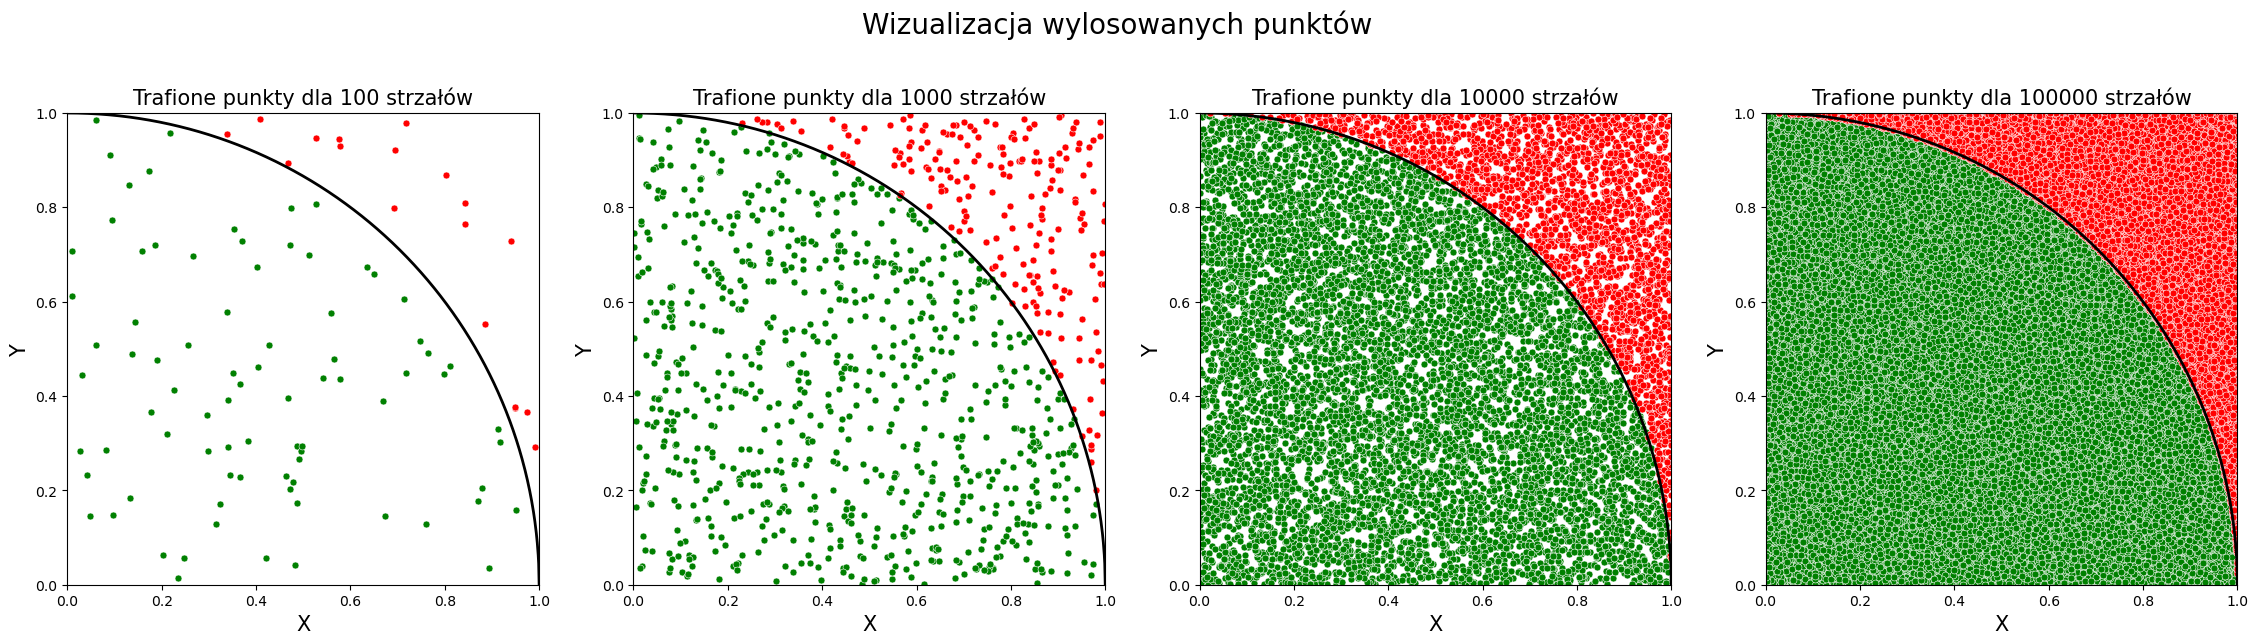

In [43]:
sizes = [100, 1000, 10000, 100000]
x = []
y = []
in_cx = []
in_cy = []
out_cx = []
out_cy = []

for i in range(len(sizes)) :
    x.append(np.random.uniform(0, 1, sizes[i]))
    y.append(np.random.uniform(0, 1, sizes[i]))
    in_cx.append(x[i][y[i] <= np.sqrt(1 - x[i]**2)])
    in_cy.append(y[i][y[i] <= np.sqrt(1 - x[i]**2)])
    out_cx.append(x[i][y[i] > np.sqrt(1 - x[i]**2)])
    out_cy.append(y[i][y[i] > np.sqrt(1 - x[i]**2)]) 
    
X = np.linspace(0,1,1000)
Y = np.sqrt(1 - X**2)

fig, ax = plt.subplots(1,4, figsize=(28,7))
plt.suptitle("Wizualizacja wylosowanych punktów", fontsize=20)
for i in range(len(sizes)) :
    ax[i].plot(X, Y, color='black', linewidth=2)
    sns.scatterplot(x = in_cx[i], y = in_cy[i], s=25, color='green', ax=ax[i])
    sns.scatterplot(x = out_cx[i], y = out_cy[i], s=25, color='red', ax=ax[i])
    ax[i].set_xlim([0,1])
    ax[i].set_ylim([0,1])
    ax[i].set_title("Trafione punkty dla {} strzałów".format(sizes[i]), fontsize=15)
    ax[i].set_xlabel("X", fontsize=15)
    ax[i].set_ylabel("Y", fontsize=15)
    ax[i].set_aspect(1)
plt.show()

### Badanie wariancji wartości $\pi$ dla określonej liczby strzałów
20-krotnie w pętli wykonałem losowanie 100 różnych ilości punktów (od 50 do 10000). Po każdym losowaniu wyliczyłem wartość $\pi$ i zapisałem ją do listy. Na końcu każdej pętli wykonałem wykres estymowanej wartości liczby $\pi$ dla każdej liczby wylosowanych punktów. Utworzył się wykres 20 linii estymujących wariancję wartości liczby $\pi$ dla każdej z ilości losowanych punktów.

###### Widać bardzo dobrze, że wraz z wzrostem ilości losowanych punktów spada rozrzut estymowanej wartości liczby $\pi$ dla danej liczby losowań.

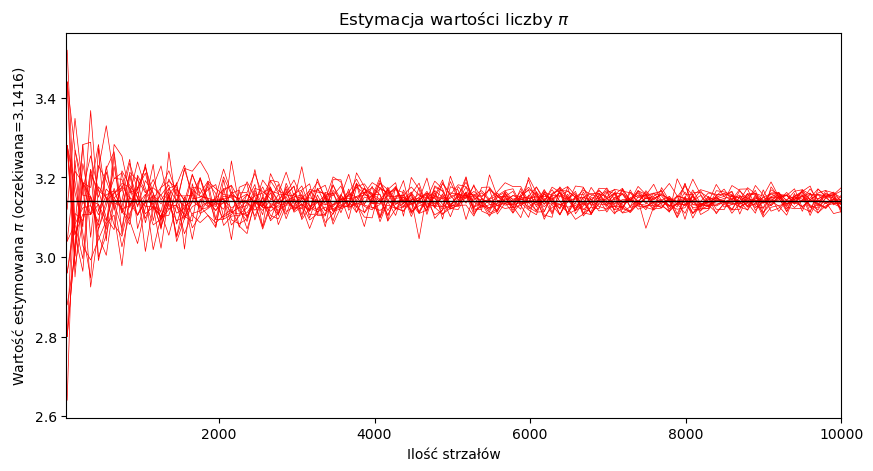

In [3]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
for j in range(20) :
    sizes = np.linspace(50, 10000, 100)
    x = []
    y = []
    in_cx = []
    in_cy = []
    out_cx = []
    out_cy = []
    pi = []
    Y = np.zeros(100)
    Y[Y == 0] = 3.1416

    for i in range(len(sizes)) :
        x = np.random.uniform(0, 1, int(sizes[i]))
        y = np.random.uniform(0, 1, int(sizes[i]))
        in_cx = x[y <= np.sqrt(1 - x**2)]
        in_cy = y[y <= np.sqrt(1 - x**2)]
        out_cx = x[y > np.sqrt(1 - x**2)]
        out_cy = y[y > np.sqrt(1 - x**2)]
        pi.append(len(in_cx) / sizes[i] * 4)

    plt.plot(sizes, pi, linewidth=0.5, color='red')
    plt.xlim([40,10000])
    plt.title("Estymacja wartości liczby $\pi$")
    plt.ylabel("Wartość estymowana $\pi$ (oczekiwana=3.1416)")
    plt.xlabel("Ilość strzałów")
plt.plot(sizes, Y, color='black', linewidth=1)
plt.show()

### Badanie poprawy estymacji wartości liczby $\pi$ wraz z wzrostem liczby losowanych punktów
10-krotnie wykonałem serię 10 losowań 100, 1000, 10000 i 100000 punktów. Wyniki zapisałem do list i wykonałem z nich boxploty.
###### Widać, że wraz z wzrostem liczby punktów zakres osi Y gwałtownie się zawęża i estymacja robi się bardzo dokładna. Przy 100 losowaniach średnia różnica wysokości ścianek pudełka wynosi około 0.2, a przy 100000 losowań wartość ta spada do około 0.005. 

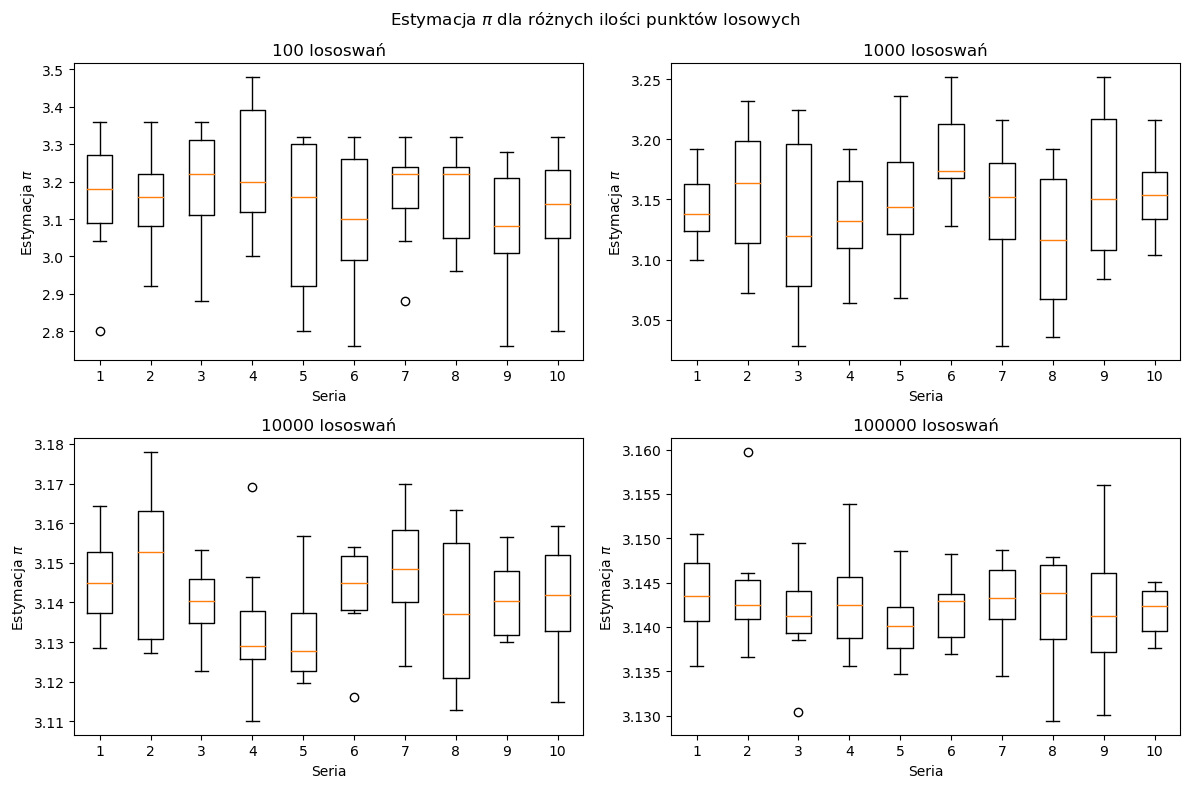

In [44]:
sizes = [100, 1000, 10000, 100000]
p102 = []
p103 = []
p104 = []
p105 = []

for i in range(10) :
    pi = [[], [], [], []]
    
    for j in range(10) :
        for k in range(len(sizes)) :
            x = np.random.uniform(0, 1, int(sizes[k]))
            y = np.random.uniform(0, 1, int(sizes[k]))
            in_cx = x[y <= np.sqrt(1 - x**2)]
            in_cy = y[y <= np.sqrt(1 - x**2)]
            out_cx = x[y > np.sqrt(1 - x**2)]
            out_cy = y[y > np.sqrt(1 - x**2)]
            pi[k].append(len(in_cx) / sizes[k] * 4)
            
    p102.append(pi[0])
    p103.append(pi[1])
    p104.append(pi[2])
    p105.append(pi[3])
        
l = [p102, p103, p104, p105]
        
fig, ax = plt.subplots(2,2, figsize=(12,8))
ax[0,0].boxplot(l[0])
ax[0,1].boxplot(l[1])
ax[1,0].boxplot(l[2])
ax[1,1].boxplot(l[3])
ax[0,0].set_xlabel("Seria")
ax[0,1].set_xlabel("Seria")
ax[1,0].set_xlabel("Seria")
ax[1,1].set_xlabel("Seria")
ax[0,0].set_ylabel("Estymacja $\pi$")
ax[0,1].set_ylabel("Estymacja $\pi$")
ax[1,0].set_ylabel("Estymacja $\pi$")
ax[1,1].set_ylabel("Estymacja $\pi$")
ax[0,0].set_title("100 lososwań")
ax[0,1].set_title("1000 lososwań")
ax[1,0].set_title("10000 lososwań")
ax[1,1].set_title("100000 lososwań")

plt.suptitle("Estymacja $\pi$ dla różnych ilości punktów losowych")
plt.tight_layout()

plt.show()